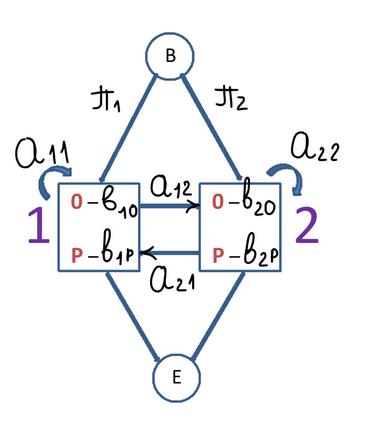

In [165]:
import pandas as pd
from IPython.display import display

# 1. Viterbi

In [146]:
def Viterbi(s, p_init, trans_prob, gen_prob):
    D1 = []
    D2 = []
    ancestors = {1: [], 2: []}
    
    cur = 0
    n = len(s)
    
    D1.append(p_init[1] * gen_prob[1][s[0]])
    D2.append(p_init[2] * gen_prob[2][s[0]])
    cur += 1
    while cur < n:
        x = D1[-1] * trans_prob[1][1] * gen_prob[1][s[cur]]
        y = D2[-1] * trans_prob[2][1] * gen_prob[1][s[cur]]
        if max(x, y) == x:
            d1 = x
            ancestors[1].append(1)
        else:
            d1 = y
            ancestors[1].append(2)
        
        x = D2[-1] * trans_prob[2][2] * gen_prob[2][s[cur]]
        y = D1[-1] * trans_prob[1][2] * gen_prob[2][s[cur]]
        if max(x, y) == x:
            d2 = x
            ancestors[2].append(2)
        else:
            d2 = y
            ancestors[2].append(1)
        
        D1.append(d1)
        D2.append(d2)
        cur += 1
    
    the_Path = ''
    cur = n - 1
    coin = 2 - (D1[-1] > D2[-1])
    while cur > 0:
        if coin == 1:
            the_Path += '1'
            coin = ancestors[1][cur-1]
        else:
            the_Path += '2'
            coin = ancestors[2][cur-1]
        cur -= 1
        
    the_Path += '1' if D1[0] > D2[0] else '2'
    return the_Path[::-1]

# 2. Forward-backward

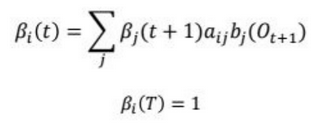

In [147]:
def ForwardBackward(s, p_init, trans_prob, gen_prob):
    n = len(s)
    
    alpha = {1: [], 2: []}
    alpha[1].append(p_init[1] * gen_prob[1][s[0]])
    alpha[2].append(p_init[2] * gen_prob[2][s[0]])
    
    # forward
    for pos in range(1, n):
        alpha1 = sum(alpha[i][-1] * trans_prob[i][1] * gen_prob[1][s[pos]] for i in (1, 2))
        alpha2 = sum(alpha[i][-1] * trans_prob[i][2] * gen_prob[2][s[pos]] for i in (1, 2))
        
        alpha[1].append(alpha1)
        alpha[2].append(alpha2)
    
    P = alpha[1][-1] + alpha[2][-1]
        
    beta = {i: [0] * n for i in (1, 2)}
    beta[1][-1] = 1
    beta[2][-1] = 1
    
    for t in range(n-2, -1, -1):
        beta1 = sum(beta[j][t+1] * trans_prob[1][j] * gen_prob[j][s[t+1]] for j in (1, 2))
        beta2 = sum(beta[j][t+1] * trans_prob[2][j] * gen_prob[j][s[t+1]] for j in (1, 2))
        
        beta[1][t] = beta1
        beta[2][t] = beta2
    
    result = [list(s), [], []]
    for i in range(n):
        for j in (1, 2):
            result[j].append(alpha[j][i] * beta[j][i] / P)
        # print(alpha[1][i] * beta[1][i] / P)
        
    
    return result

## Первый тест

In [166]:
s = 'ОРОРОРООРРРРРРРРРРОООООООО'
p_init = {1: 0.5, 2: 0.5}
gen_prob = {
    1: {'О': 0.5, 'Р': 0.5},
    2: {'О': 0.1, 'Р': 0.9}
}
trans_prob = {
    1: {1: 0.8, 2: 0.2},
    2: {1: 0.2, 2: 0.8}
}

res = Viterbi(s, p_init, trans_prob, gen_prob)
print('Viterbi:')
print(res)

res = ForwardBackward(s, p_init, trans_prob, gen_prob)
res[1] = [round(x, 2) for x in res[1]]
res[2] = [round(x, 2) for x in res[2]]
print('Forward-Backward:')
df = pd.DataFrame(res)
display(df)

Viterbi:
11111111222222222211111111
Forward-Backward:


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,О,Р,О,Р,О,Р,О,О,Р,Р,...,Р,Р,О,О,О,О,О,О,О,О
1,0.86,0.77,0.88,0.78,0.89,0.8,0.91,0.86,0.46,0.27,...,0.28,0.47,0.89,0.96,0.98,0.98,0.98,0.98,0.97,0.94
2,0.14,0.23,0.12,0.22,0.11,0.2,0.09,0.14,0.54,0.73,...,0.72,0.53,0.11,0.04,0.02,0.02,0.02,0.02,0.03,0.06


In [163]:
for i in range(len(s)):
    print(res[0][i], res[1][i], res[2][i])

О 0.86 0.14
Р 0.77 0.23
О 0.88 0.12
Р 0.78 0.22
О 0.89 0.11
Р 0.8 0.2
О 0.91 0.09
О 0.86 0.14
Р 0.46 0.54
Р 0.27 0.73
Р 0.19 0.81
Р 0.15 0.85
Р 0.14 0.86
Р 0.14 0.86
Р 0.15 0.85
Р 0.19 0.81
Р 0.28 0.72
Р 0.47 0.53
О 0.89 0.11
О 0.96 0.04
О 0.98 0.02
О 0.98 0.02
О 0.98 0.02
О 0.98 0.02
О 0.97 0.03
О 0.94 0.06


## Второй тест

In [167]:
s = 'ОРОРОРООРРРРРРРРРРОООООООО'
p_init = {1: 0.5, 2: 0.5}
trans_prob = {
    1: {1: 0.5, 2: 0.5},
    2: {1: 0.5, 2: 0.5}
}
gen_prob = {
    1: {'О': 0.5, 'Р': 0.5},
    2: {'О': 0.51, 'Р': 0.49}
}
res = Viterbi(s, p_init, trans_prob, gen_prob)
print('Viterbi:')
print(res)
res = ForwardBackward(s, p_init, trans_prob, gen_prob)
res[1] = [round(x, 2) for x in res[1]]
res[2] = [round(x, 2) for x in res[2]]
print('Forward-Backward:')
df = pd.DataFrame(res)
display(df)

Viterbi:
21212122111111111122222222
Forward-Backward:


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,О,Р,О,Р,О,Р,О,О,Р,Р,...,Р,Р,О,О,О,О,О,О,О,О
1,0.5,0.51,0.5,0.51,0.5,0.51,0.5,0.5,0.51,0.51,...,0.51,0.51,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
2,0.5,0.49,0.5,0.49,0.5,0.49,0.5,0.5,0.49,0.49,...,0.49,0.49,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5


In [161]:
for i in range(len(s)):
    print(res[0][i], res[1][i], res[2][i])

О 0.5 0.5
Р 0.51 0.49
О 0.5 0.5
Р 0.51 0.49
О 0.5 0.5
Р 0.51 0.49
О 0.5 0.5
О 0.5 0.5
Р 0.51 0.49
Р 0.51 0.49
Р 0.51 0.49
Р 0.51 0.49
Р 0.51 0.49
Р 0.51 0.49
Р 0.51 0.49
Р 0.51 0.49
Р 0.51 0.49
Р 0.51 0.49
О 0.5 0.5
О 0.5 0.5
О 0.5 0.5
О 0.5 0.5
О 0.5 0.5
О 0.5 0.5
О 0.5 0.5
О 0.5 0.5
